In [1]:
import xml.etree.ElementTree as Xet
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [7]:
source_path = r'D:\8th_Sem_Proj\Dataset\8th_Sem_Proj'
file_path = source_path + r'\train\Annotations_?**\*.xml'
row = []
classes = {'Early_Blight':0,'Healthy':1,'mold_leaf':2}
distribution = [0, 0, 0]
x=0
for i in glob.iglob(file_path,recursive=True):
    xmlparse = Xet.parse(i)
    root = xmlparse.getroot()
    name = root.find('filename').text
    name = name.split('.')[:-1]
    name = '.'.join(name)
    img_path = root.find('path').text
    img_path = img_path.split('8th_Sem_Proj')[-1]
    img_path = source_path + img_path
    img = cv2.imread(img_path)
    img_height, img_width, n = img.shape
    data = []
    # <class> <x-center> <y-center> <width> <height>
    # ex: '0 0.4563 0.6765 0.444 0.7876'
    # width    W = (xmax-xmin)/2
    # height   H = (ymax-ymin)/2
    # x-center X = xmin + w
    # y-center Y = ymin + h

    for i in root.findall('object'):
        label = i.find('name').text
        l_class = classes[label]
        for j in i.findall('bndbox'):
            xmin = int(j.find('xmin').text)
            ymin = int(j.find('ymin').text)
            xmax = int(j.find('xmax').text)
            ymax = int(j.find('ymax').text)

            W = ((xmax-xmin)/2)/img_width
            H = ((ymax-ymin)/2)/img_height
            X = (xmin +W)/img_width
            Y = (ymin + H)/img_height
            # divide by width and height to normalize in range [0,1]
            string = f'{l_class} {X} {Y} {W} {H}\n' # <class> <x-center> <y-center> <width> <height>
            data.append(string)
    
    distribution[l_class]+=1
    label_path = os.path.join(source_path,'label_train',name+'.txt')
    file = open(label_path,'w')
    file.writelines(data)
    file.close()
    #file = open(label_path,'r')
    #print(file.read())


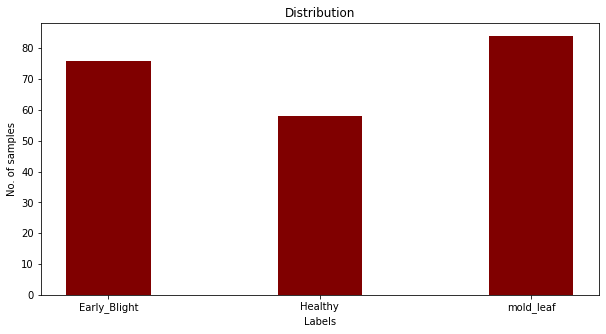

In [8]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classes.keys(), distribution, color ='maroon',
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of samples")
plt.title("Distribution")
plt.show()